<a href="https://colab.research.google.com/github/henka-d87tg83ic2/ML_Utils_Collection/blob/main/f_PR_kNN2_cb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 簡単なk-最近傍法

[0]
[[0.66666667 0.33333333]]


/tmp/ipython-input-3064633742.py:71: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3064633742.py:71: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3064633742.py:71: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3064633742.py:71: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3064633742.py:71: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3064633742.py:71: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3064633742.py:71: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from font

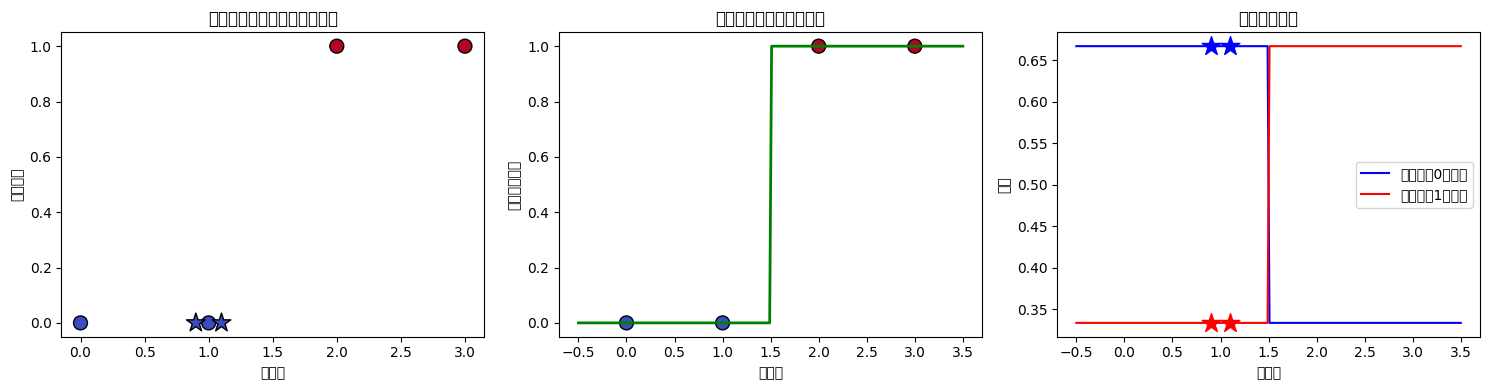

/tmp/ipython-input-3064633742.py:87: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3064633742.py:87: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3064633742.py:87: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3064633742.py:87: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3064633742.py:87: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3064633742.py:87: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3064633742.py:87: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) 

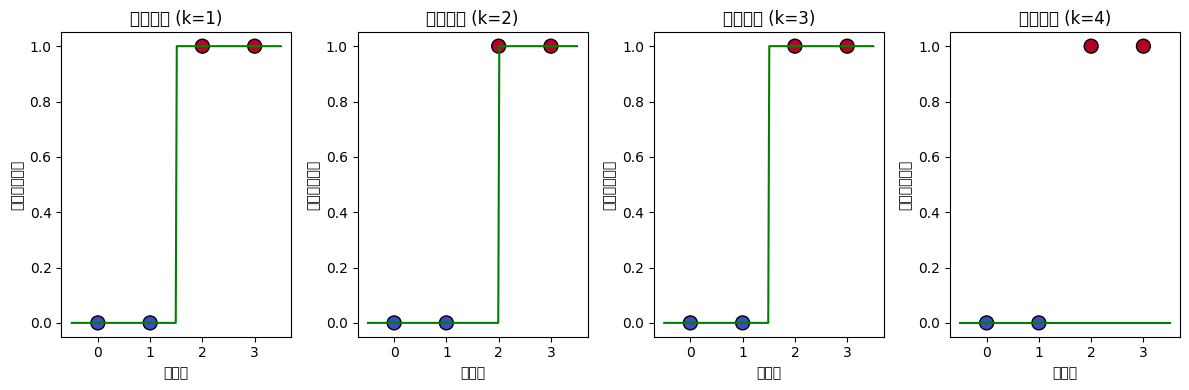

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# 0と1をグループ「0」に、2と3をグループ「1」に分類
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

# モデル（分類器）を作る
neigh = KNeighborsClassifier(n_neighbors = 3)
# 訓練データを満たすようにモデル（分類器）を学習させる（距離を計算する）
neigh.fit(X, y)

# 1.1は「0」と「1」のどちらのグループに分類するのがいいか
print(neigh.predict([[1.1]]))
# 0.9はグループ「0」に属する確率が高いか、グループ「1」に属する確率が高いか
print(neigh.predict_proba([[0.9]]))

#-----------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# データとラベル
X = np.array([[0],[1],[2],[3]])
y = np.array([0,0,1,1])

# KNNモデル
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# 可視化用の範囲
xx = np.linspace(-0.5, 3.5, 200).reshape(-1,1)

# 予測ラベルと確率
y_pred = knn.predict(xx)
y_proba = knn.predict_proba(xx)

# 特定の点
test_points = np.array([[1.1],[0.9]])
test_pred = knn.predict(test_points)
test_proba = knn.predict_proba(test_points)

# --- 1. 散布図 ---
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(X, y, c=y, cmap='coolwarm', s=100, edgecolors='k')
plt.scatter(test_points, test_pred, c=test_pred, cmap='coolwarm', s=200, marker='*', edgecolors='k')
plt.title("学習データ散布図とテスト点")
plt.xlabel("入力値")
plt.ylabel("グループ")

# --- 2. 分類境界 ---
plt.subplot(1,3,2)
plt.scatter(X, y, c=y, cmap='coolwarm', s=100, edgecolors='k')
plt.plot(xx, y_pred, color='green', linewidth=2)
plt.title("分類境界（予測ラベル）")
plt.xlabel("入力値")
plt.ylabel("予測グループ")

# --- 3. 予測確率曲線 ---
plt.subplot(1,3,3)
plt.plot(xx, y_proba[:,0], label="グループ0の確率", color='blue')
plt.plot(xx, y_proba[:,1], label="グループ1の確率", color='red')
plt.scatter(test_points, test_proba[:,0], color='blue', marker='*', s=200)
plt.scatter(test_points, test_proba[:,1], color='red', marker='*', s=200)
plt.title("予測確率曲線")
plt.xlabel("入力値")
plt.ylabel("確率")
plt.legend()

plt.tight_layout()
plt.show()

#-----------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# データとラベル
X = np.array([[0],[1],[2],[3]])
y = np.array([0,0,1,1])

# 可視化用の範囲
xx = np.linspace(-0.5, 3.5, 200).reshape(-1,1)

# --- 1. k=3 の分類境界と確率 ---
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(xx)
y_proba = knn.predict_proba(xx)

plt.figure(figsize=(15,4))

# 散布図 + 境界
plt.subplot(1,3,1)
plt.scatter(X, y, c=y, cmap='coolwarm', s=100, edgecolors='k')
plt.plot(xx, y_pred, color='green')
plt.title("分類境界 (k=3)")
plt.xlabel("入力値")
plt.ylabel("予測グループ")

# 確率曲線
plt.subplot(1,3,2)
plt.plot(xx, y_proba[:,0], label="グループ0の確率", color='blue')
plt.plot(xx, y_proba[:,1], label="グループ1の確率", color='red')
plt.title("予測確率曲線 (k=3)")
plt.xlabel("入力値")
plt.ylabel("確率")
plt.legend()

# 近傍点の可視化
test_point = np.array([[1.1]])
neighbors = knn.kneighbors(test_point, return_distance=False)
plt.subplot(1,3,3)
plt.scatter(X, y, c=y, cmap='coolwarm', s=100, edgecolors='k')
plt.scatter(test_point, knn.predict(test_point), c='green', marker='*', s=200, edgecolors='k')
for idx in neighbors[0]:
    plt.plot([test_point[0][0], X[idx][0]], [knn.predict(test_point)[0], y[idx]], 'k--')
plt.title("近傍点の可視化 (k=3)")
plt.xlabel("入力値")
plt.ylabel("グループ")

plt.tight_layout()
plt.show()

# --- 2. k=1,3,5 の比較 ---
plt.figure(figsize=(12,4))
for i,k in enumerate([1,3,5]):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    y_pred = knn.predict(xx)
    plt.subplot(1,3,i+1)
    plt.scatter(X, y, c=y, cmap='coolwarm', s=100, edgecolors='k')
    plt.plot(xx, y_pred, color='green')
    plt.title(f"分類境界 (k={k})")
    plt.xlabel("入力値")
    plt.ylabel("予測グループ")

plt.tight_layout()
plt.show()


### irisデータセット

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150,)
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figur

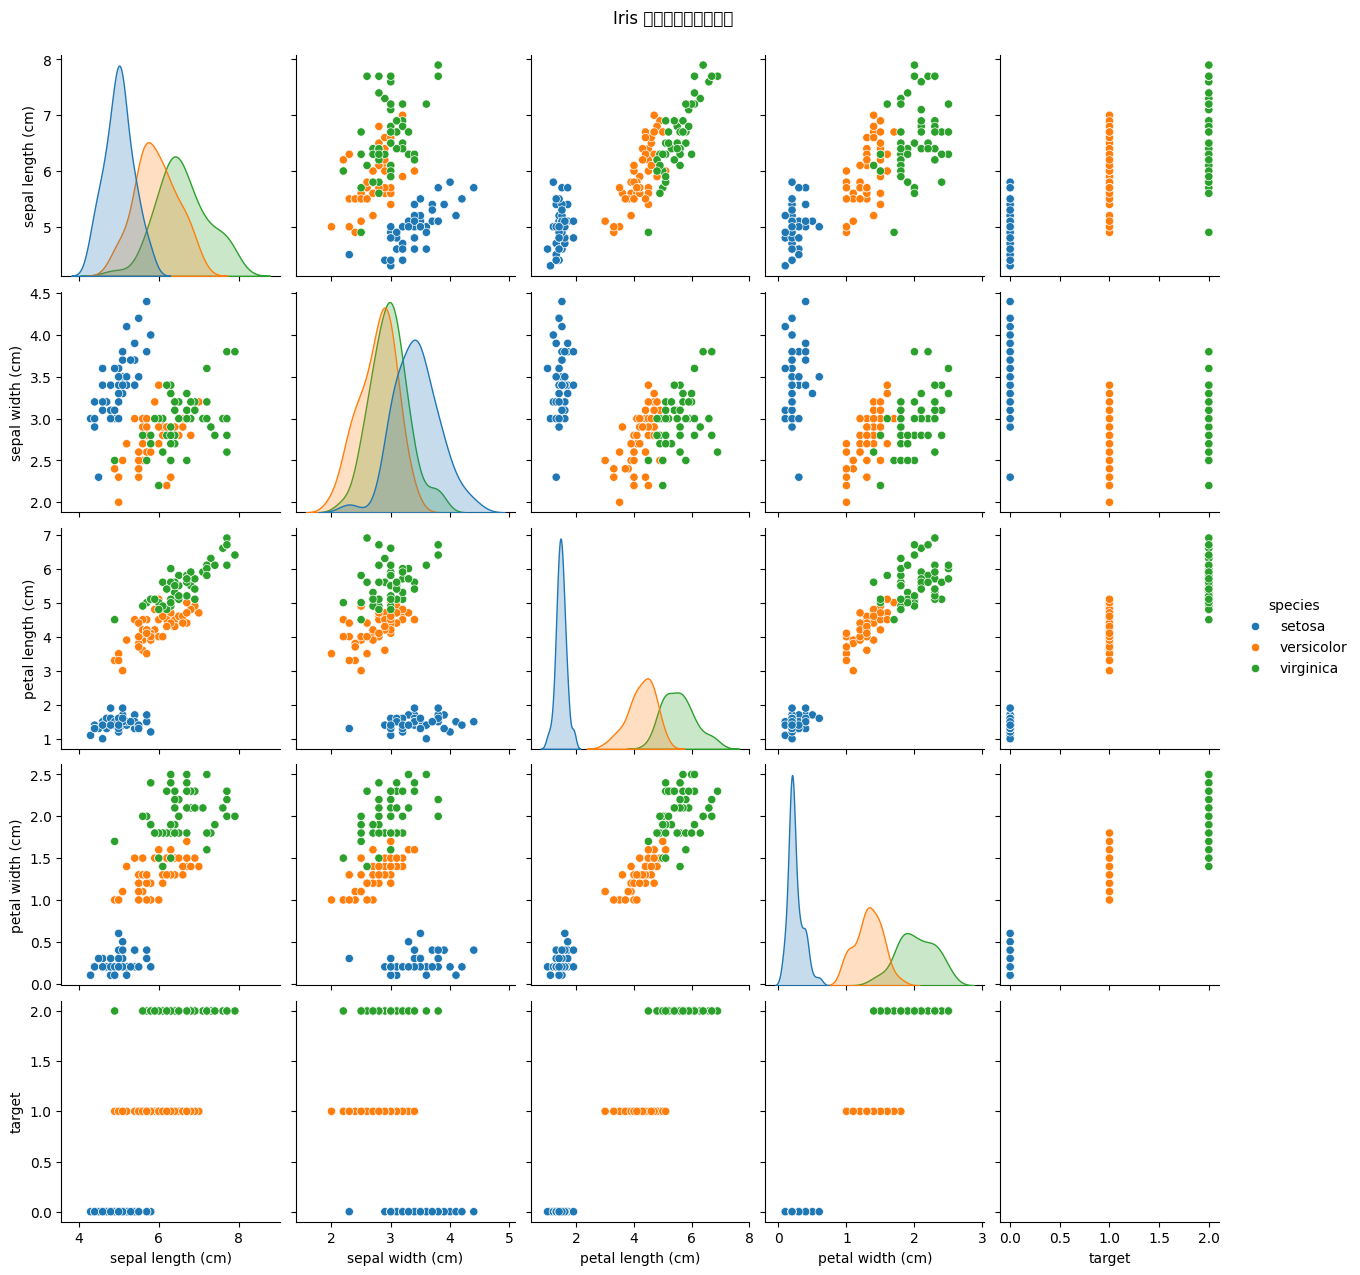

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24321 (\N{CJK UNIFIED IDEOGRAPH-5F01}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

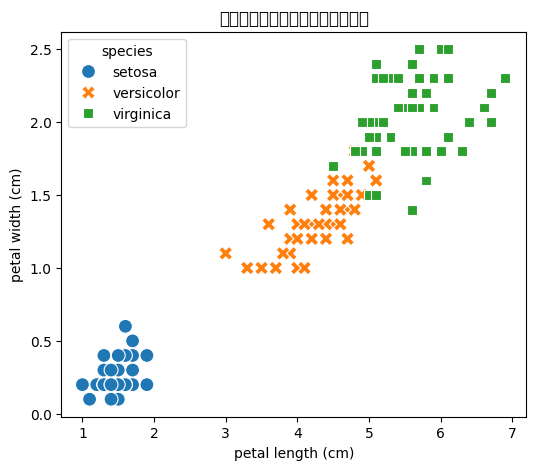

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12367 (\N{HIRAGANA LETTER KU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

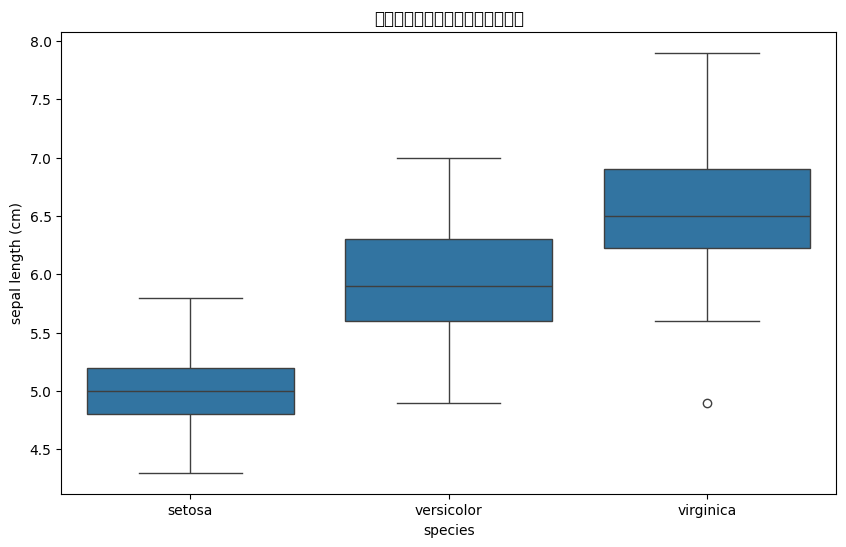

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

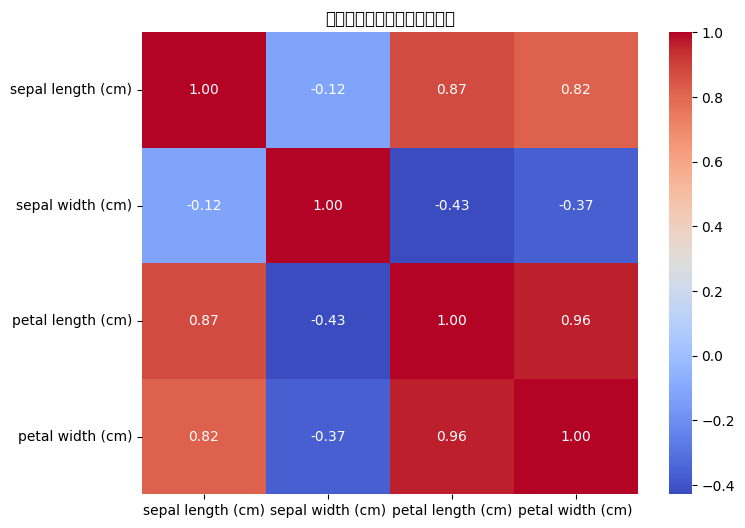

In [14]:
from sklearn.datasets import load_iris

iris = load_iris() #irisデータをロード

print(iris.data.shape) # データの形状
print(iris.feature_names) # データの特徴量
print(iris.data[:10]) # データの特徴量を10個表示

print(iris.target.shape) # クラス(ラベル)の形状
print(iris.target_names) # ラベルの名前
print(iris.target) # ラベルをすべて表示

#-----------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# データロード
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

# 1. 散布図行列 (pairplot)
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("Iris データの散布図行列", y=1.02)
plt.show()

# 2. 代表的な特徴量の散布図
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="species", style="species", s=100)
plt.title("花弁の長さと幅による分類可視化")
plt.show()

# 3. 箱ひげ図
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="species", y="sepal length (cm)")
plt.title("がく片の長さの分布（種別ごと）")
plt.show()

# 4. 相関ヒートマップ
plt.figure(figsize=(8,6))
corr = df.iloc[:,:4].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("特徴量間の相関ヒートマップ")
plt.show()


### データフレームに変換

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12498 (\N{KATAKANA LETTER HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

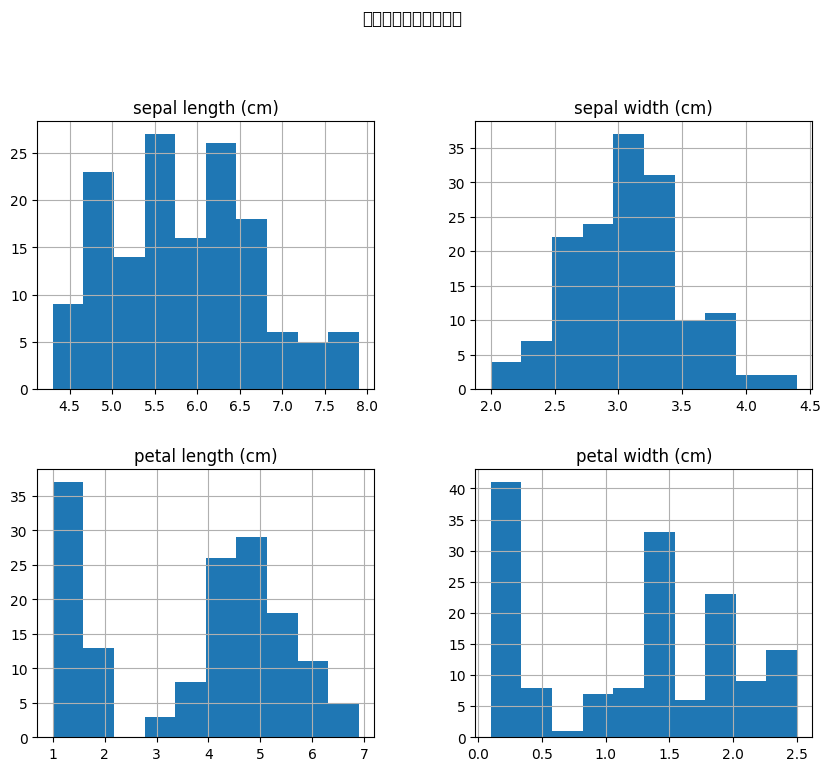

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12367 (\N{HIRAGANA LETTER KU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

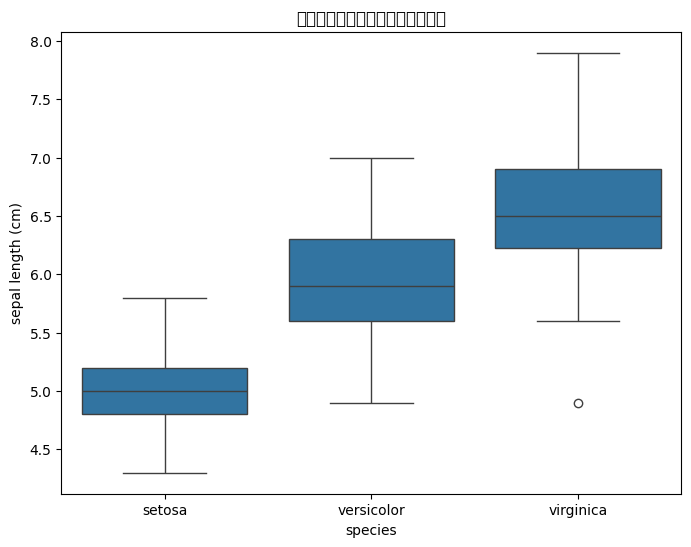

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figur

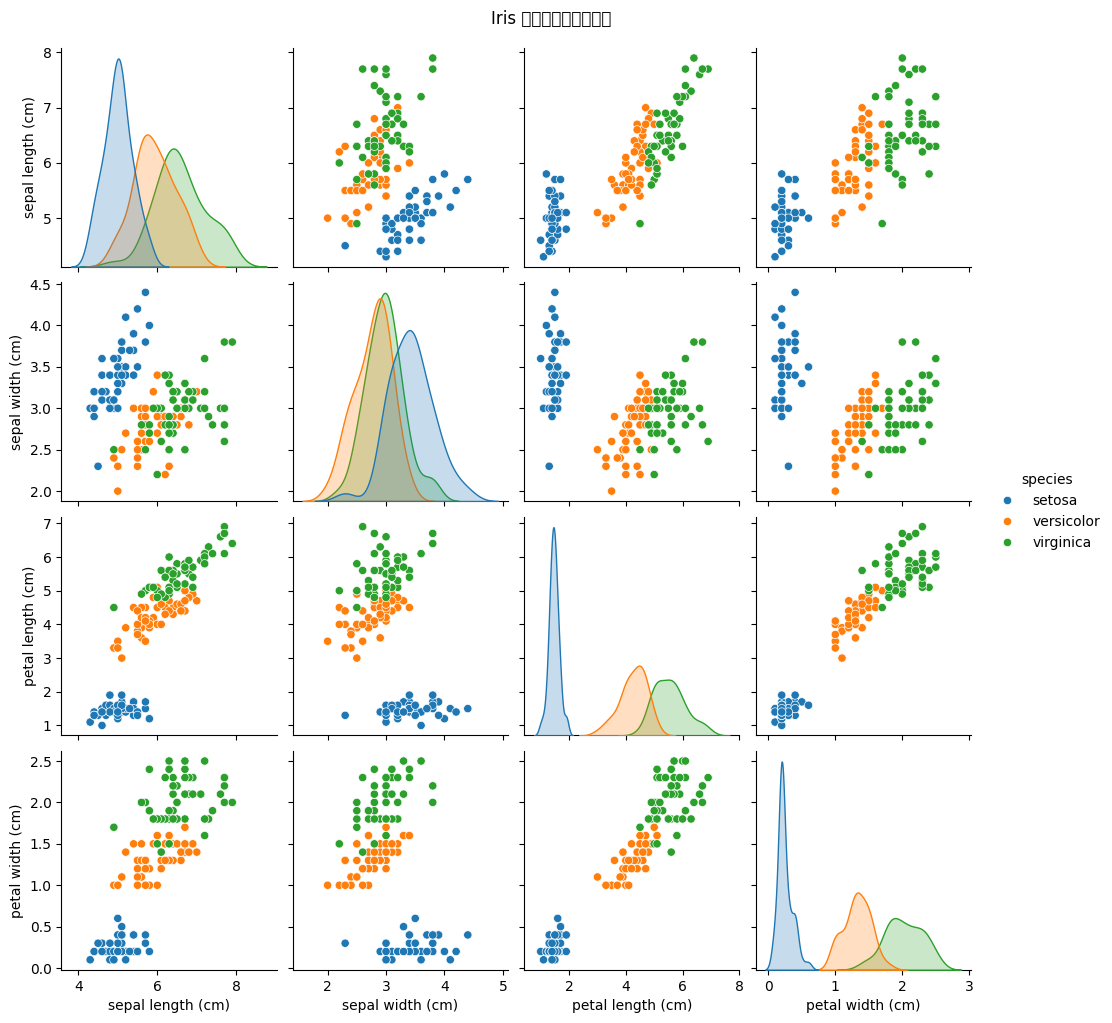

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

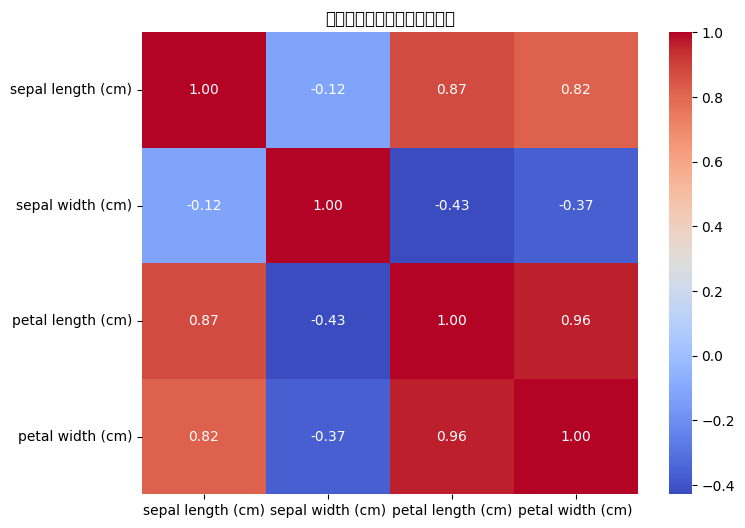

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24321 (\N{CJK UNIFIED IDEOGRAPH-5F01}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

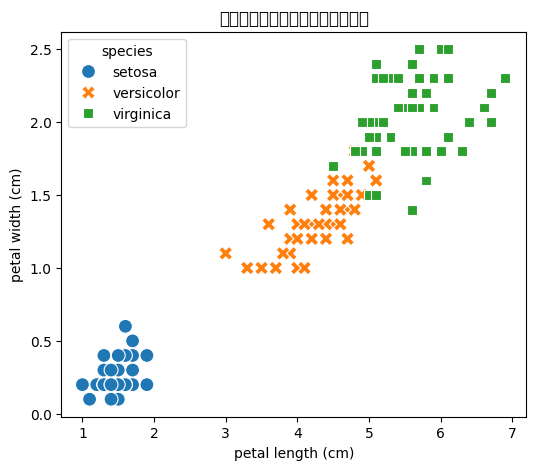

In [15]:
import pandas as pd # データ解析モジュール

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names) # irisのdataをデータフレーム形式に変換
df_iris['species'] = [iris.target_names[i] for i in iris.target] # irisのtargetを、データフレームに、speciesという属性名で追加
df_iris.describe() # データの概要

#-----------------------
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ヒストグラム
df_iris.hist(figsize=(10,8))
plt.suptitle("特徴量のヒストグラム", y=1.02)
plt.show()

# 2. 箱ひげ図（例: がく片の長さ）
plt.figure(figsize=(8,6))
sns.boxplot(data=df_iris, x="species", y="sepal length (cm)")
plt.title("がく片の長さの分布（種別ごと）")
plt.show()

# 3. 散布図行列 (pairplot)
sns.pairplot(df_iris, hue="species", diag_kind="kde")
plt.suptitle("Iris データの散布図行列", y=1.02)
plt.show()

# 4. 相関ヒートマップ
plt.figure(figsize=(8,6))
corr = df_iris.iloc[:,:4].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("特徴量間の相関ヒートマップ")
plt.show()

# 5. 花弁の長さと幅の散布図
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_iris, x="petal length (cm)", y="petal width (cm)", hue="species", style="species", s=100)
plt.title("花弁の長さと幅による分類可視化")
plt.show()


### ペアプロット

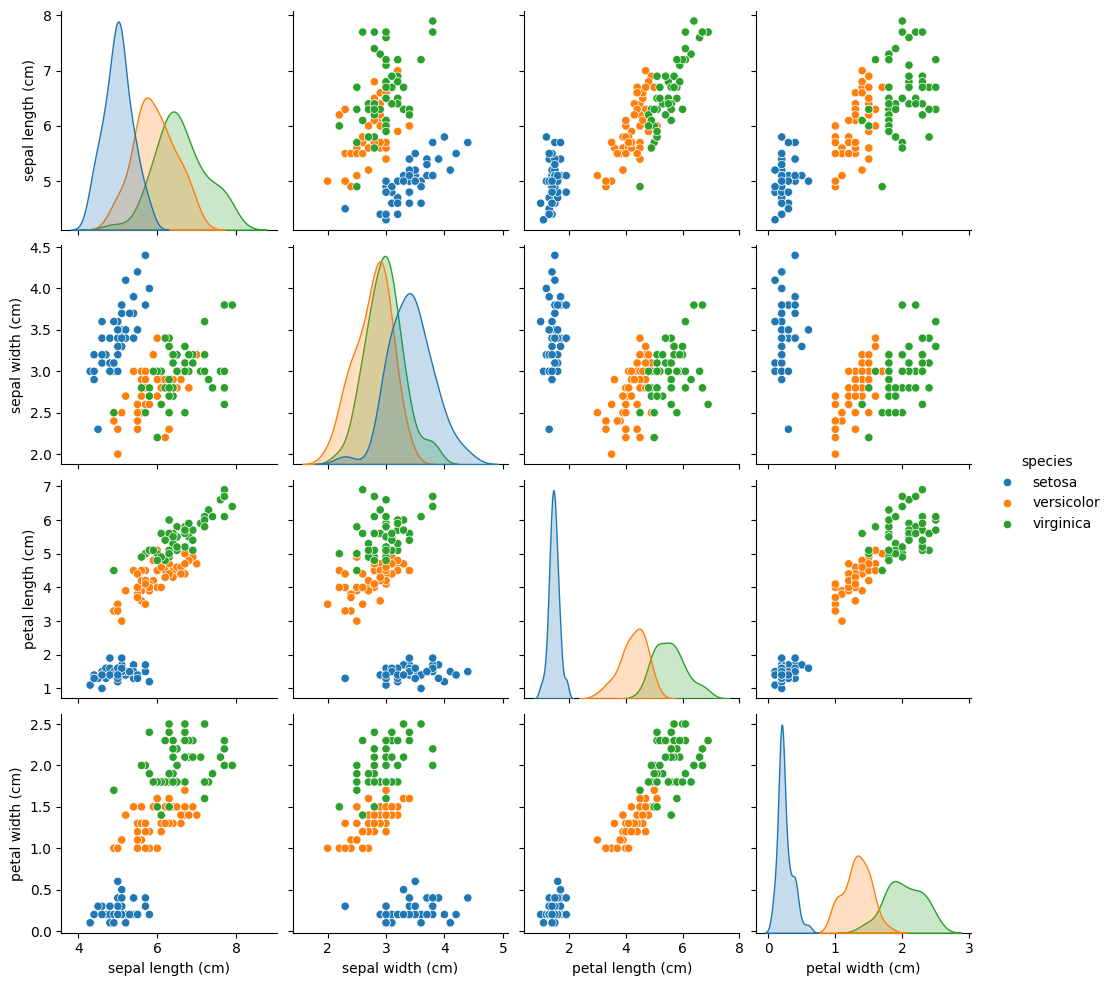

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12506 (\N{KATAKANA LETTER PE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

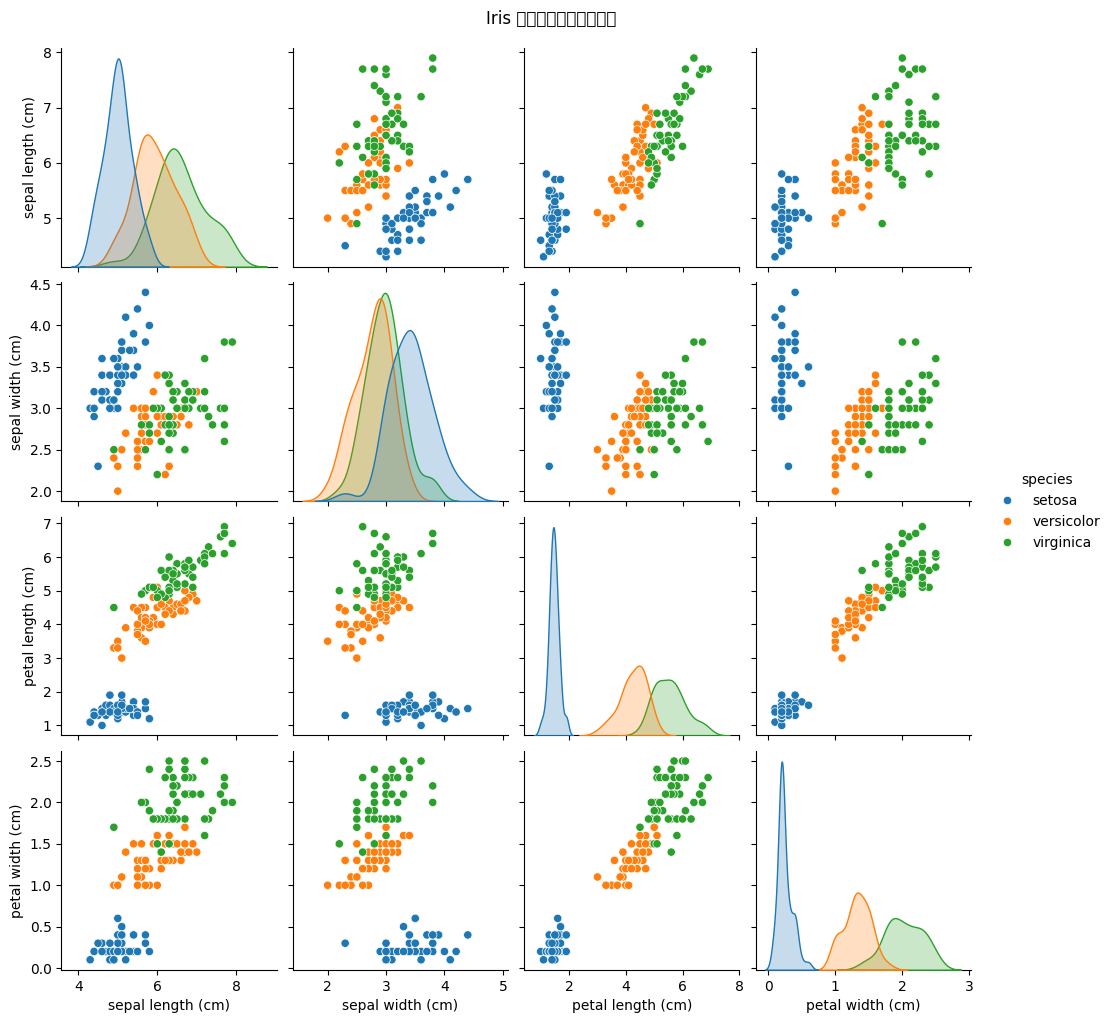

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12498 (\N{KATAKANA LETTER HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

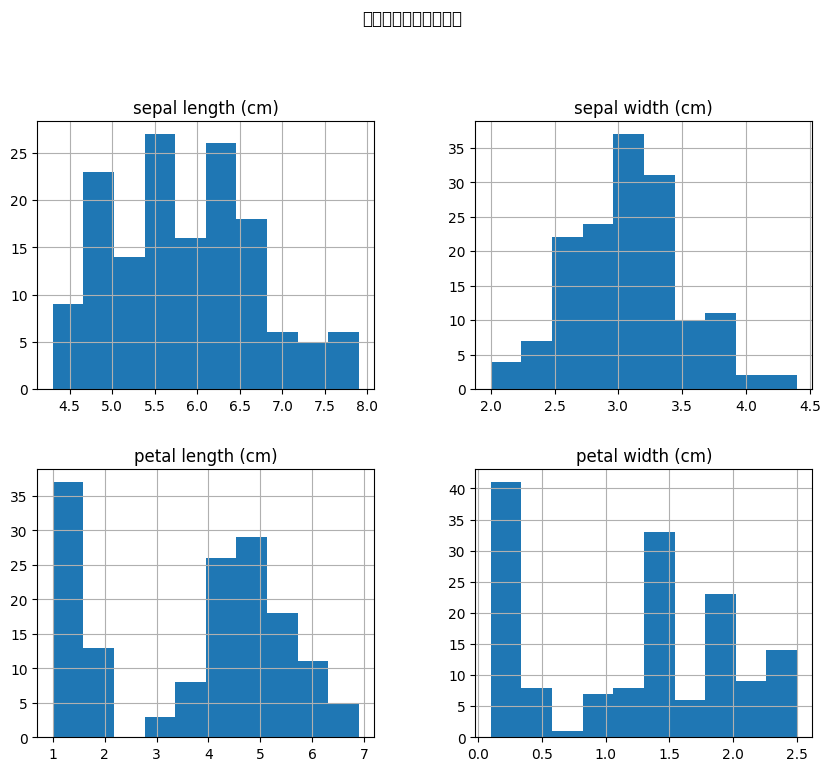

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24321 (\N{CJK UNIFIED IDEOGRAPH-5F01}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

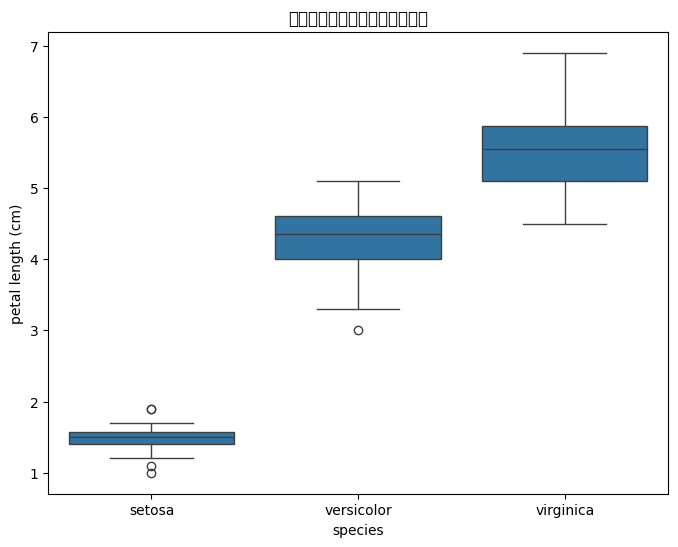

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

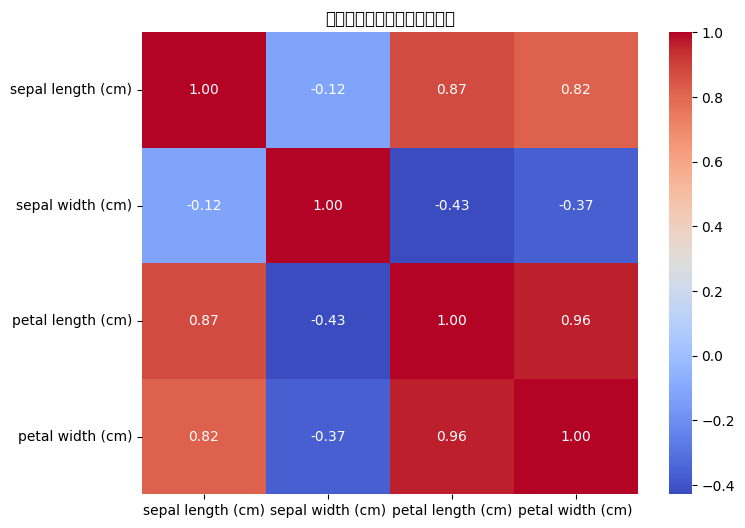

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24321 (\N{CJK UNIFIED IDEOGRAPH-5F01}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

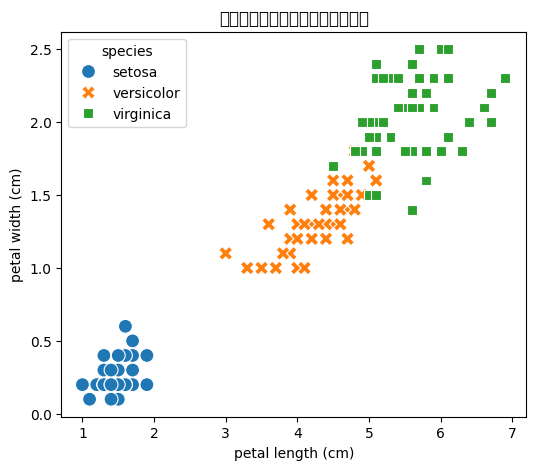

In [16]:
import seaborn as sns # データ可視化モジュール

sns.pairplot(df_iris, hue="species") # ペアプロットを表示（hueは、色分けをするカテゴリ変数名）

#-----------------------
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ペアプロット
sns.pairplot(df_iris, hue="species", diag_kind="kde")
plt.suptitle("Iris データのペアプロット", y=1.02)
plt.show()

# 2. ヒストグラム
df_iris.hist(figsize=(10,8))
plt.suptitle("特徴量のヒストグラム", y=1.02)
plt.show()

# 3. 箱ひげ図（例: 花弁の長さ）
plt.figure(figsize=(8,6))
sns.boxplot(data=df_iris, x="species", y="petal length (cm)")
plt.title("花弁の長さの分布（種別ごと）")
plt.show()

# 4. 相関ヒートマップ
plt.figure(figsize=(8,6))
corr = df_iris.iloc[:,:4].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("特徴量間の相関ヒートマップ")
plt.show()

# 5. 花弁の長さと幅の散布図
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_iris, x="petal length (cm)", y="petal width (cm)", hue="species", style="species", s=100)
plt.title("花弁の長さと幅による分類可視化")
plt.show()


### 訓練データとテストデータ

In [17]:
from sklearn.model_selection import train_test_split
#データを訓練用と試験用に分割
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1, shuffle = True)

### 標準化

In [18]:
# StandardScalerを使って、平均0分散1になるようにスケーリング
from sklearn.preprocessing import StandardScaler
# 特徴量（入力データ）
ss = StandardScaler() # 標準化のためのスケーラー
ss.fit(x_train) # 変換のためのパラメータ（平均と標準偏差）を計算
x_train_std = ss.transform(x_train) # データの変換（標準化の実行）
x_test_std = ss.transform(x_test)
print(x_train_std[:5]) # 入力でデータを5件表示
print(x_test_std[:5])

[[ 0.31553662 -0.04578885  0.44767531  0.23380268]
 [ 2.2449325  -0.04578885  1.29769171  1.39742892]
 [-0.2873996  -1.24028061  0.05100098 -0.15407273]
 [ 0.67729835 -0.52358555  1.01435291  1.13884531]
 [-0.04622511 -0.52358555  0.73101411  1.52672073]]
[[-0.04622511  2.34319467 -1.47902854 -1.31769898]
 [-0.89033581 -1.24028061 -0.45900886 -0.15407273]
 [ 0.91847283 -0.04578885  0.33433978  0.23380268]
 [-0.52857408  2.10429632 -1.42236078 -1.05911537]
 [ 2.48610699  1.86539796  1.46769499  1.00955351]]


### 分類器の作成と分類予測

In [22]:
# K-近傍法
from sklearn.neighbors import KNeighborsClassifier

# モデル（分類器）を用意する
clf_knn = KNeighborsClassifier(n_neighbors = 3)

# 訓練データを満たすようにモデル（分類器）を学習させる（距離を計算する）
clf_knn.fit(x_train_std, y_train)

# 分類器による予測を試験用データに対して行う
from sklearn.metrics import accuracy_score
y_pred = clf_knn.predict(x_test_std)
print(accuracy_score(y_test, y_pred))

1.0


### 最近傍の数kで、分類性能がどのように変わるか確認

[1]  score = 1.00
[2]  score = 0.97
[3]  score = 1.00
[4]  score = 1.00
[5]  score = 0.97
[6]  score = 1.00
[7]  score = 0.97
[8]  score = 1.00
[9]  score = 1.00
[10]  score = 1.00
[11]  score = 1.00
[12]  score = 1.00
[13]  score = 0.97
[14]  score = 0.97
[15]  score = 0.97
[16]  score = 0.97
[17]  score = 0.93
[18]  score = 0.97
[19]  score = 0.93
[20]  score = 0.97
[21]  score = 0.97
[22]  score = 0.97
[23]  score = 0.97
[24]  score = 0.97
[25]  score = 0.97
[26]  score = 0.97
[27]  score = 0.97
[28]  score = 0.97
[29]  score = 0.93
[30]  score = 0.97
[31]  score = 0.93
[32]  score = 0.93
[33]  score = 0.93
[34]  score = 0.93
[35]  score = 0.93
[36]  score = 0.93
[37]  score = 0.93
[38]  score = 0.93
[39]  score = 0.93
[40]  score = 0.93
[41]  score = 0.93
[42]  score = 0.93
[43]  score = 0.90
[44]  score = 0.90
[45]  score = 0.90
[46]  score = 0.90
[47]  score = 0.90
[48]  score = 0.87
[49]  score = 0.87
[50]  score = 0.87


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

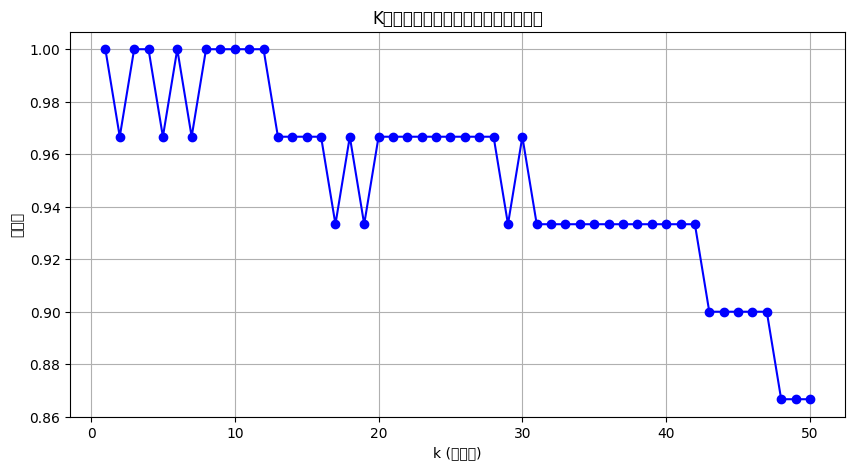

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26834 (\N{CJK UNIFIED IDEOGRAPH-68D2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


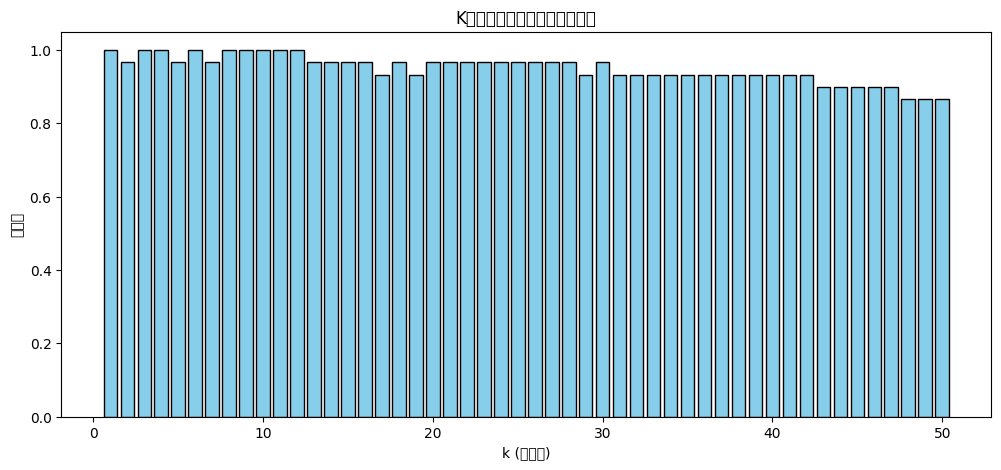

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

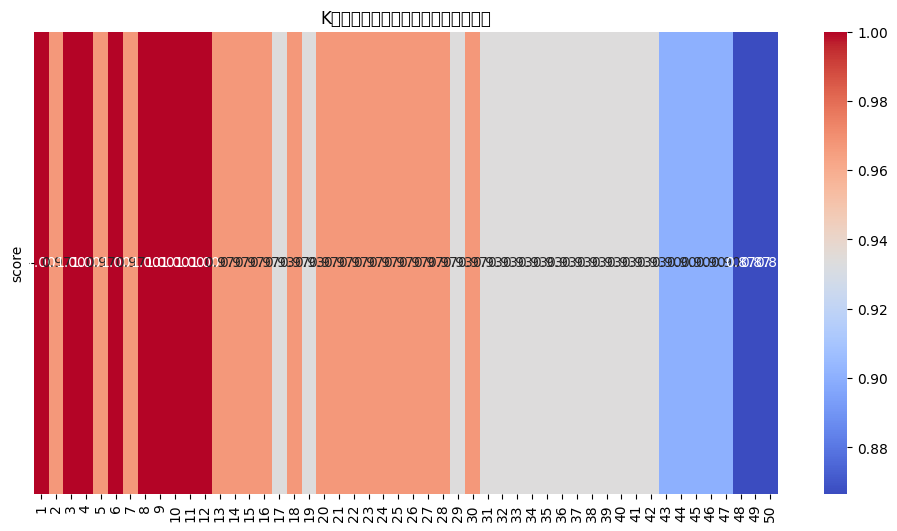

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33391 (\N{CJK UNIFIED IDEOGRAPH-826F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24375 (\N{CJK UNIFIED IDEOGRAPH-5F37}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35519 (\N{CJK UNIFIED IDEOGRAPH-8ABF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34920 (\N{CJK UNIFIED IDEOGRAPH-8868}) missing from font(s) DejaVu Sans.
  fig.canvas

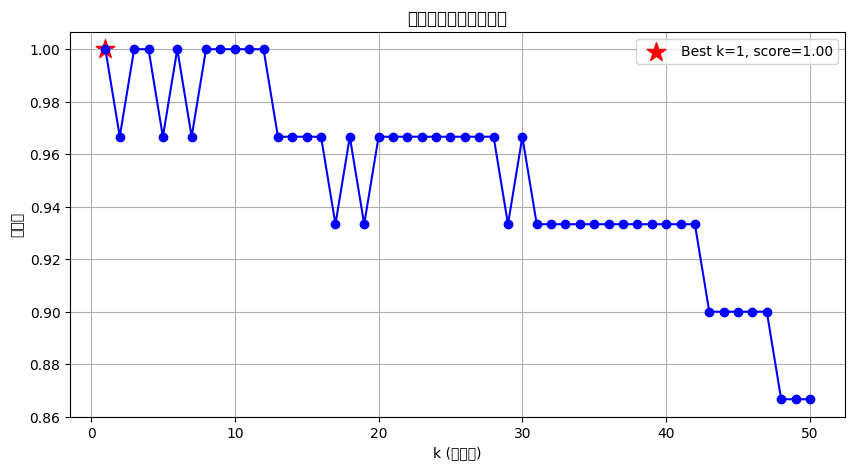

In [23]:
list_k = []
list_score = []

# ===== kを変えながらモデルを順番に学習
for k in range(1, 51):
  # KNeighborsClassifier
  clf_knn1 = KNeighborsClassifier(n_neighbors = k)
  clf_knn1.fit(x_train_std, y_train)

  # 評価
  # スコア R^2（決定係数）
  score = clf_knn1.score(x_test_std, y_test)
  print("[%d]  score = %.2f" % (k, score))

  list_k.append(k)
  list_score.append(score)
#-----------------------
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# list_k, list_score が既に定義されている前提

# 1. 折れ線グラフ
plt.figure(figsize=(10,5))
plt.plot(list_k, list_score, marker='o', color='blue')
plt.title("K値とスコアの関係（折れ線グラフ）")
plt.xlabel("k (近傍数)")
plt.ylabel("スコア")
plt.grid(True)
plt.show()

# 2. 棒グラフ
plt.figure(figsize=(12,5))
plt.bar(list_k, list_score, color='skyblue', edgecolor='black')
plt.title("K値ごとのスコア（棒グラフ）")
plt.xlabel("k (近傍数)")
plt.ylabel("スコア")
plt.show()

# 3. ヒートマップ風可視化
plt.figure(figsize=(12,6))
sns.heatmap(np.array(list_score).reshape(1,-1),
            cmap="coolwarm", annot=True, fmt=".2f",
            xticklabels=list_k, yticklabels=["score"])
plt.title("K値ごとのスコア（ヒートマップ風）")
plt.show()

# 4. 最良スコアの強調
best_k = list_k[np.argmax(list_score)]
best_score = max(list_score)

plt.figure(figsize=(10,5))
plt.plot(list_k, list_score, marker='o', color='blue')
plt.scatter(best_k, best_score, color='red', s=200, marker='*', label=f"Best k={best_k}, score={best_score:.2f}")
plt.title("最良スコアの強調表示")
plt.xlabel("k (近傍数)")
plt.ylabel("スコア")
plt.legend()
plt.grid(True)
plt.show()


### kに対する分類の決定係数（適合度）

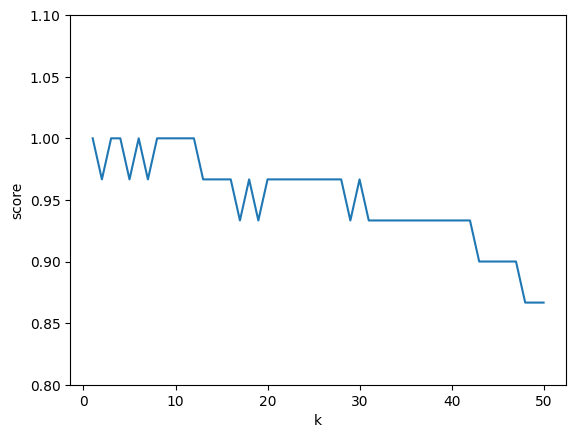

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20418 (\N{CJK UNIFIED IDEOGRAPH-4FC2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25240 (\N{CJK UNIFIED IDEOGRAPH-6298}) missing from font(s) DejaVu Sans.
  fig.canvas

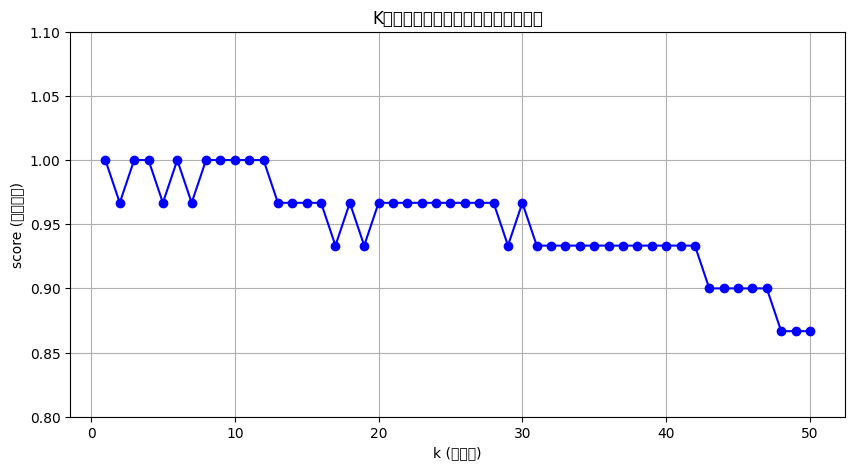

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26834 (\N{CJK UNIFIED IDEOGRAPH-68D2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


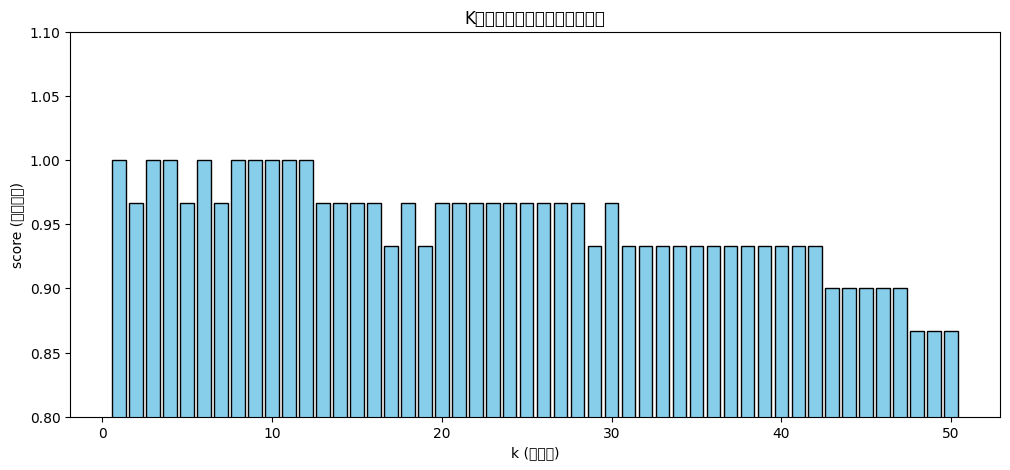

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

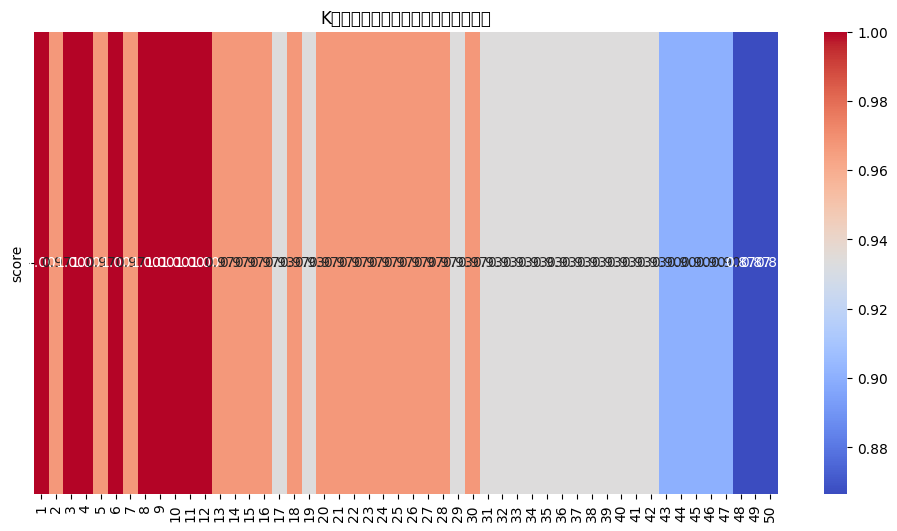

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20418 (\N{CJK UNIFIED IDEOGRAPH-4FC2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.canvas

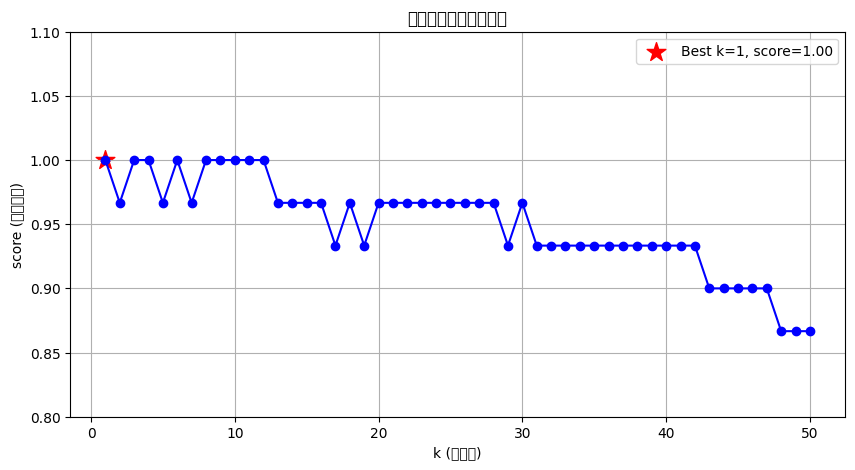

In [24]:
import matplotlib.pyplot as plt
# プロット
plt.ylim(0.8, 1.1)
plt.xlabel("k")
plt.ylabel("score")
plt.plot(list_k, list_score)
plt.show()

#-----------------------
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# list_k, list_score が既に定義されている前提

# 1. 折れ線グラフ
plt.figure(figsize=(10,5))
plt.plot(list_k, list_score, marker='o', color='blue')
plt.ylim(0.8, 1.1)
plt.xlabel("k (近傍数)")
plt.ylabel("score (決定係数)")
plt.title("K値とスコアの関係（折れ線グラフ）")
plt.grid(True)
plt.show()

# 2. 棒グラフ
plt.figure(figsize=(12,5))
plt.bar(list_k, list_score, color='skyblue', edgecolor='black')
plt.ylim(0.8, 1.1)
plt.xlabel("k (近傍数)")
plt.ylabel("score (決定係数)")
plt.title("K値ごとのスコア（棒グラフ）")
plt.show()

# 3. ヒートマップ風可視化
plt.figure(figsize=(12,6))
sns.heatmap(np.array(list_score).reshape(1,-1),
            cmap="coolwarm", annot=True, fmt=".2f",
            xticklabels=list_k, yticklabels=["score"])
plt.title("K値ごとのスコア（ヒートマップ風）")
plt.show()

# 4. 最良スコアの強調
best_k = list_k[np.argmax(list_score)]
best_score = max(list_score)

plt.figure(figsize=(10,5))
plt.plot(list_k, list_score, marker='o', color='blue')
plt.scatter(best_k, best_score, color='red', s=200, marker='*',
            label=f"Best k={best_k}, score={best_score:.2f}")
plt.ylim(0.8, 1.1)
plt.xlabel("k (近傍数)")
plt.ylabel("score (決定係数)")
plt.title("最良スコアの強調表示")
plt.legend()
plt.grid(True)
plt.show()
